<a href="https://colab.research.google.com/github/vrishank-ramineni/ECON3916---Statistics-Machine-Learning/blob/main/Lab_3_Visualizing_Development_with_WBGAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Define Economies: IND (India), UMC (Upper Middle Income), WLD (World)
country_codes = ['IND', 'UMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',
    'NY.GDP.MKTP.KD': 'GDP_Const',
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',
    'NE.EXP.GNFS.ZS': 'Exports_GDP',
    'NE.IMP.GNFS.ZS': 'Imports_GDP',
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'
}

In [18]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract India for specific calculations
df_ind = df.xs('IND', axis=1, level=0).copy()

Fetching data...


In [19]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_ind['Natural_Rate_Unemp'] = df_ind['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_ind['Productivity'] = df_ind['GDP_Const'] / df_ind['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_ind['NCO'] = df_ind['Exports_GDP'] - df_ind['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_ind['Budget_Balance'] = df_ind['Tax_Rev_GDP'] - df_ind['Gov_Exp_GDP']

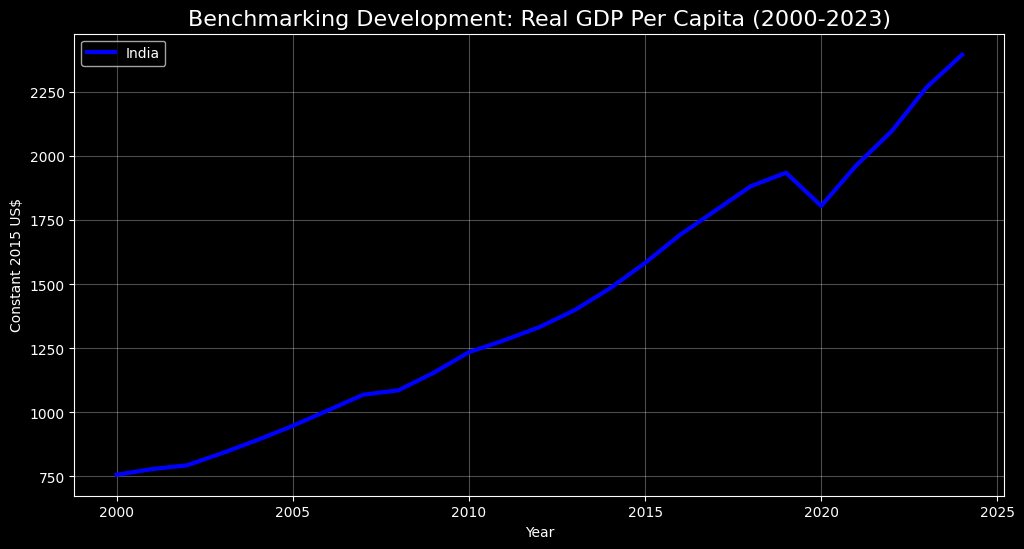

In [20]:
plt.figure(figsize=(12, 6))
# Plot ONLY India
plt.plot(df.index, df[('IND', 'GDP_Per_Capita_Const')], label='India', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

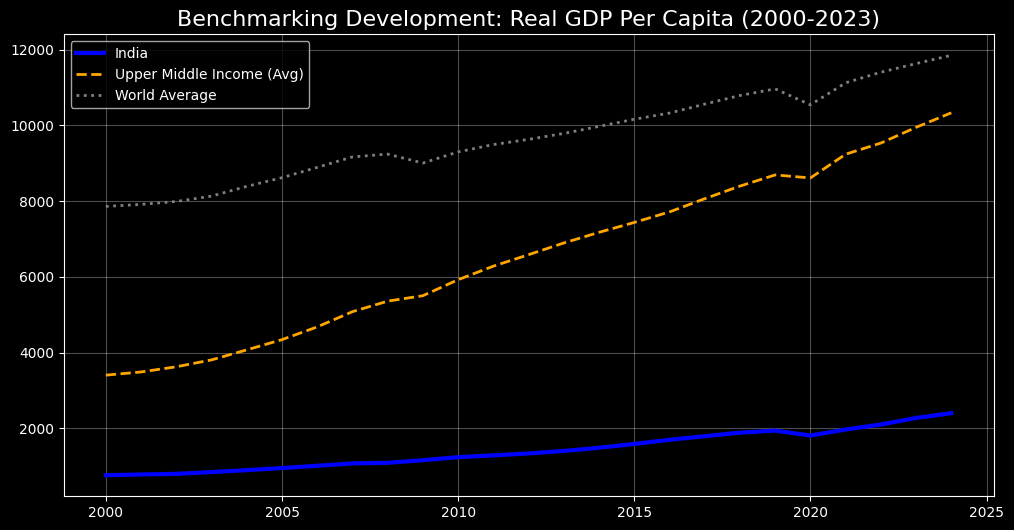

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('IND', 'GDP_Per_Capita_Const')], label='India', color='blue', linewidth=3)
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

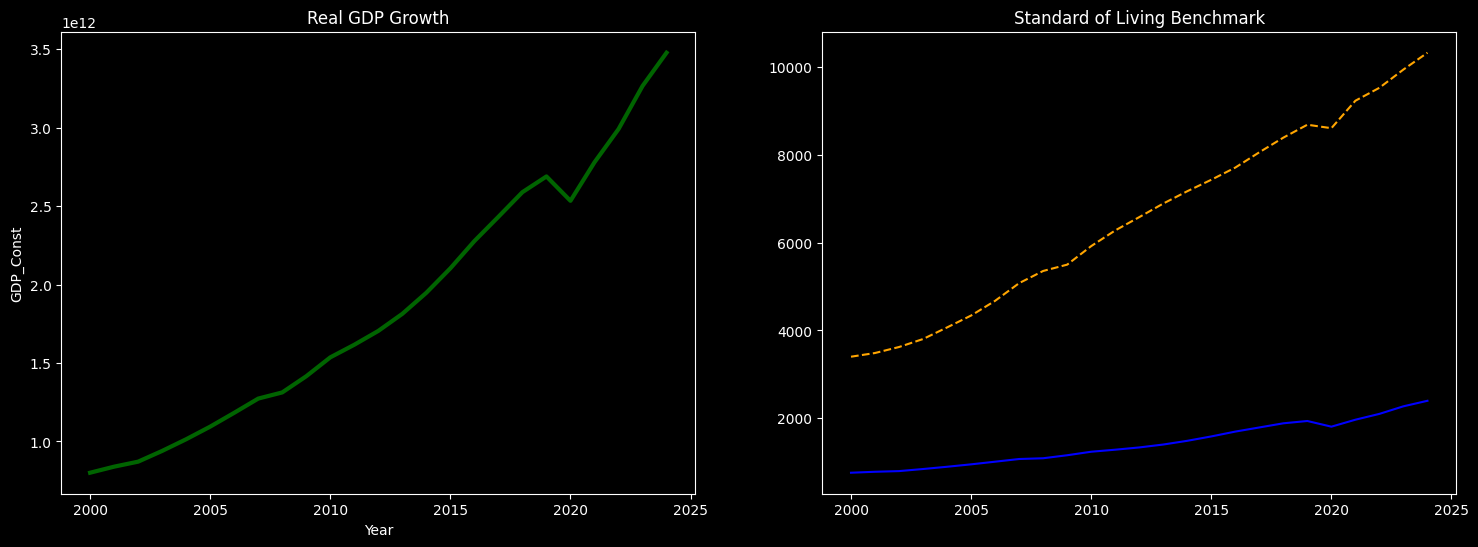

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_ind, x=df_ind.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('IND', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')

plt.show()

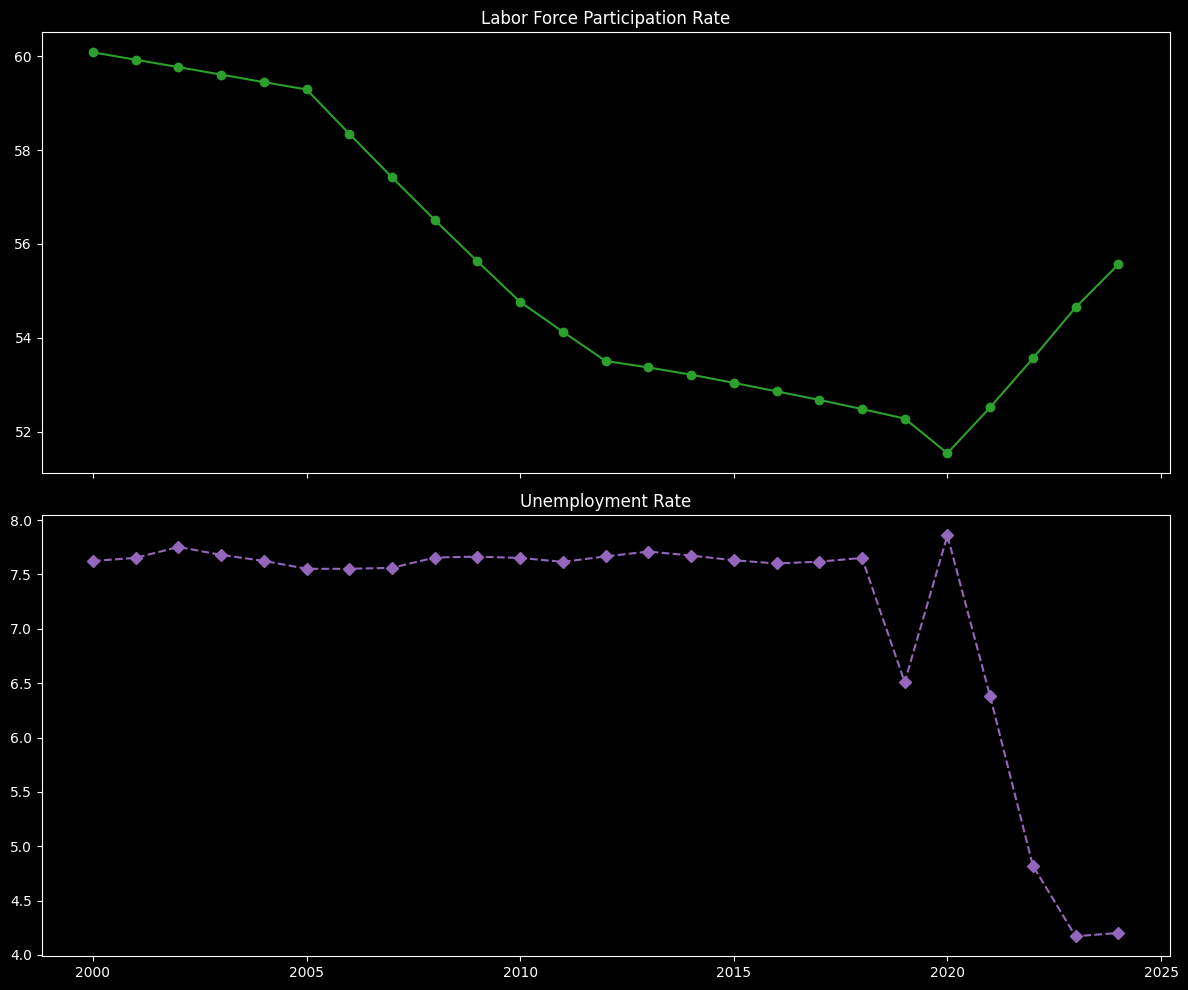

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_ind.index, df_ind['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_ind.index, df_ind['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')

plt.tight_layout()
plt.show()

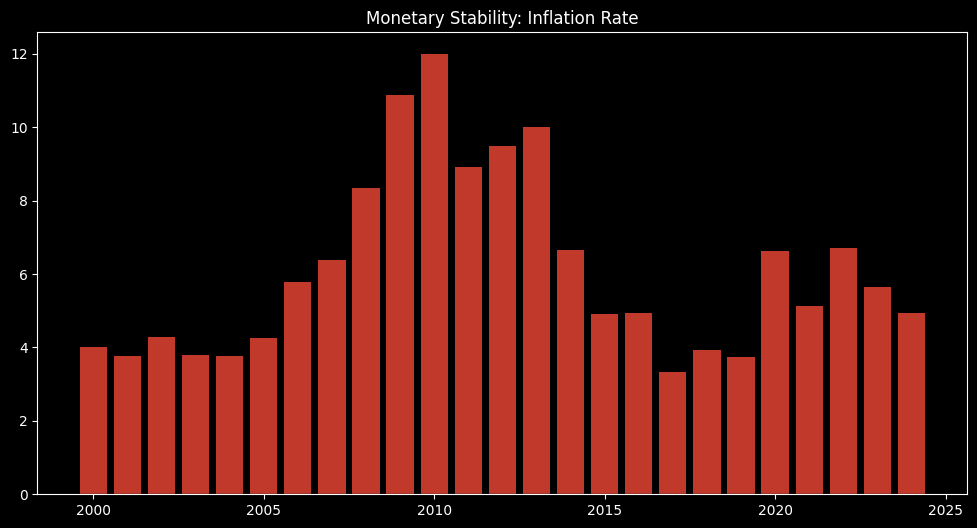

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(df_ind.index, df_ind['Inflation_CPI'], color='#c0392b')
plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

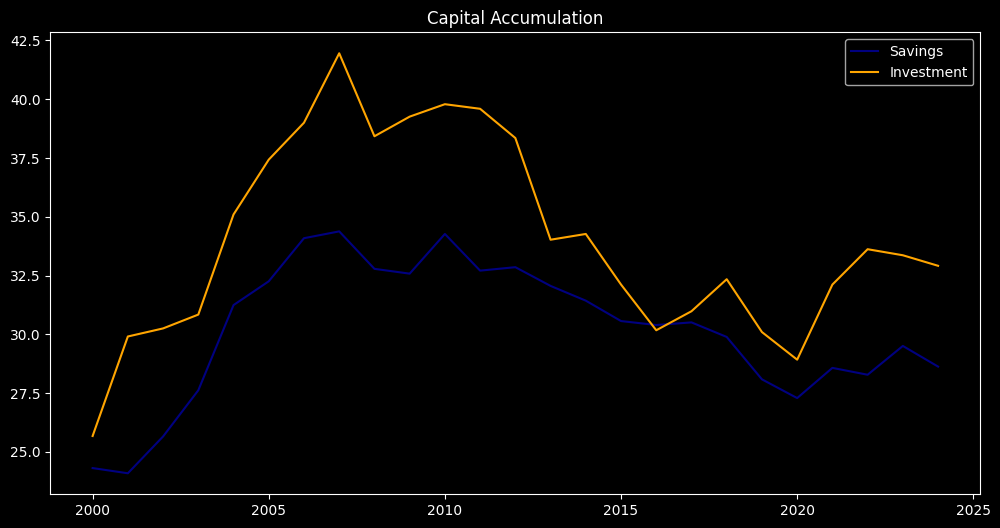

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df_ind.index, df_ind['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_ind.index, df_ind['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

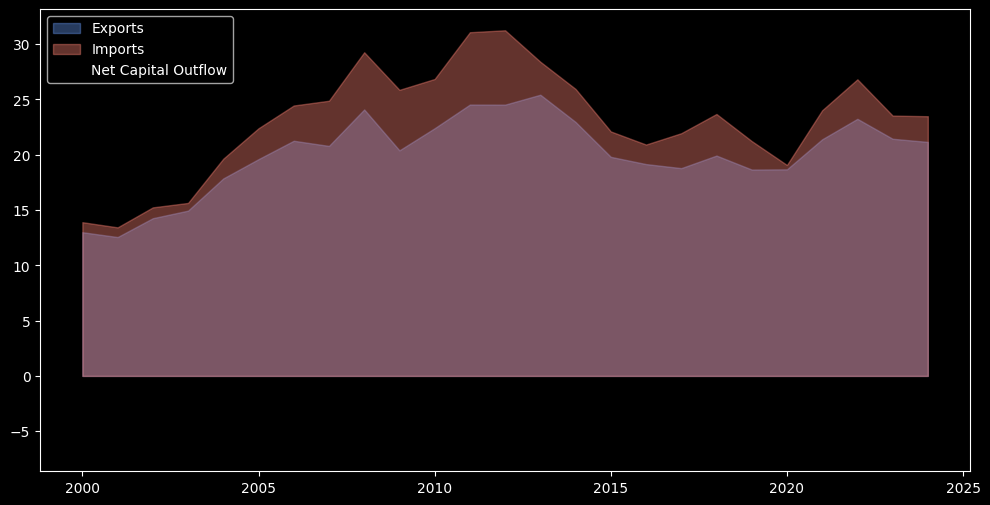

In [26]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_ind.index, df_ind['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_ind.index, df_ind['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_ind.index, df_ind['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

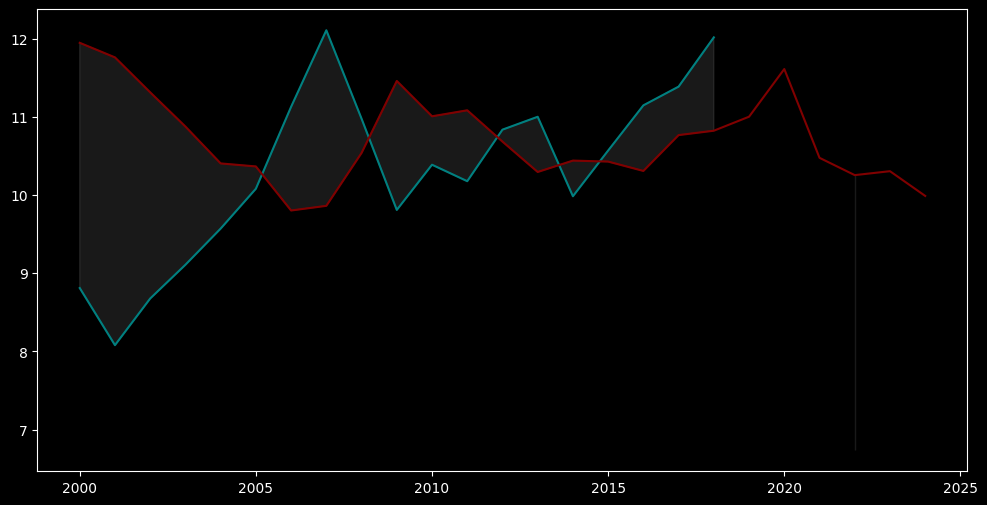

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df_ind.index, df_ind['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_ind.index, df_ind['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_ind.index, df_ind['Tax_Rev_GDP'], df_ind['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

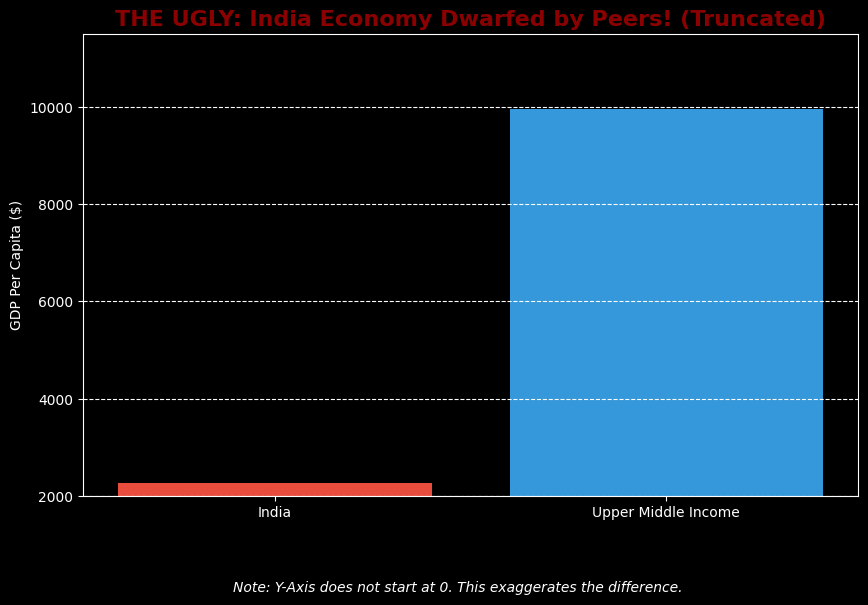

In [28]:
# THE UGLY CHART
snapshot_year = 2023
ind_val = df.loc[snapshot_year, ('IND', 'GDP_Per_Capita_Const')]
umc_val = df.loc[snapshot_year, ('UMC', 'GDP_Per_Capita_Const')]
values = [ind_val, umc_val]
labels = ['India', 'Upper Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#e74c3c', '#3498db'])

# THE VIOLATION: Truncating the axis
plt.ylim(2000, 11500)
plt.title('THE UGLY: India Economy Dwarfed by Peers! (Truncated)', fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('GDP Per Capita ($)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05, "Note: Y-Axis does not start at 0. This exaggerates the difference.", ha="center", style='italic')
plt.show()

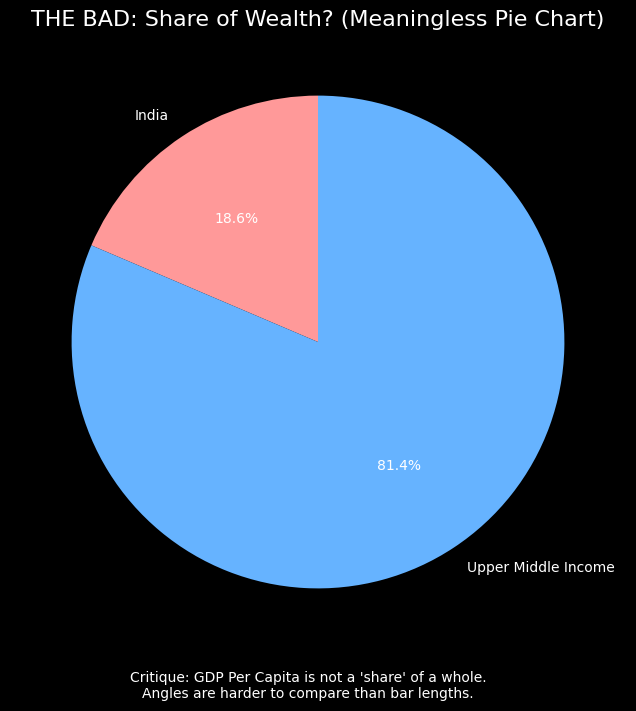

In [29]:
# THE BAD CHART
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")
plt.show()

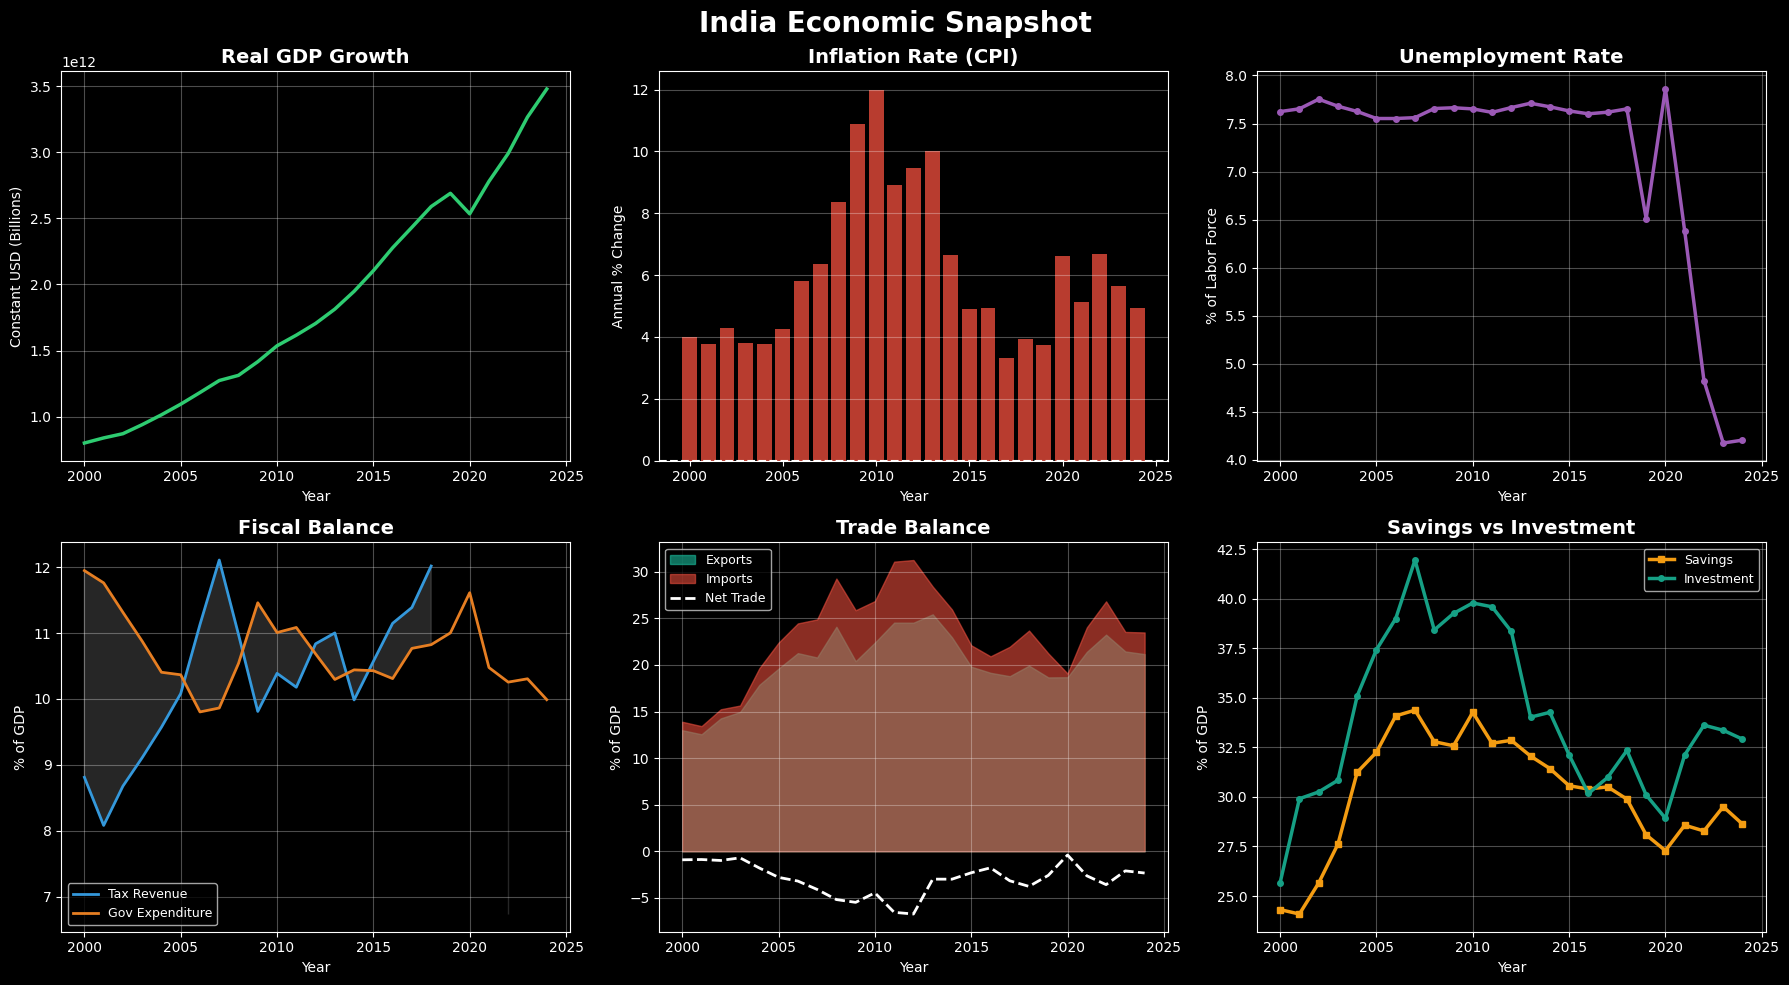

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set dark background style
plt.style.use('dark_background')

# Create 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Main title
fig.suptitle('India Economic Snapshot', fontsize=20, fontweight='bold', y=0.98)

# Top Left: Real GDP
axes[0, 0].plot(df_ind.index, df_ind['GDP_Const'], color='#2ecc71', linewidth=2.5)
axes[0, 0].set_title('Real GDP Growth', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Constant USD (Billions)')
axes[0, 0].grid(True, alpha=0.3)

# Top Middle: Inflation Rate
axes[0, 1].bar(df_ind.index, df_ind['Inflation_CPI'], color='#e74c3c', alpha=0.8)
axes[0, 1].axhline(0, color='white', linewidth=1.5, linestyle='--')
axes[0, 1].set_title('Inflation Rate (CPI)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Annual % Change')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Top Right: Unemployment Rate
axes[0, 2].plot(df_ind.index, df_ind['Unemployment_Rate'],
                color='#9b59b6', linewidth=2.5, marker='o', markersize=4)
axes[0, 2].set_title('Unemployment Rate', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Year')
axes[0, 2].set_ylabel('% of Labor Force')
axes[0, 2].grid(True, alpha=0.3)

# Bottom Left: Fiscal Balance
axes[1, 0].plot(df_ind.index, df_ind['Tax_Rev_GDP'],
                label='Tax Revenue', color='#3498db', linewidth=2)
axes[1, 0].plot(df_ind.index, df_ind['Gov_Exp_GDP'],
                label='Gov Expenditure', color='#e67e22', linewidth=2)
axes[1, 0].fill_between(df_ind.index, df_ind['Tax_Rev_GDP'], df_ind['Gov_Exp_GDP'],
                        color='gray', alpha=0.3)
axes[1, 0].set_title('Fiscal Balance', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('% of GDP')
axes[1, 0].legend(loc='best', fontsize=9)
axes[1, 0].grid(True, alpha=0.3)

# Bottom Middle: Trade Balance
axes[1, 1].fill_between(df_ind.index, df_ind['Exports_GDP'],
                        color='#1abc9c', alpha=0.6, label='Exports')
axes[1, 1].fill_between(df_ind.index, df_ind['Imports_GDP'],
                        color='#e74c3c', alpha=0.6, label='Imports')
axes[1, 1].plot(df_ind.index, df_ind['Exports_GDP'] - df_ind['Imports_GDP'],
                color='white', linewidth=2, linestyle='--', label='Net Trade')
axes[1, 1].set_title('Trade Balance', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('% of GDP')
axes[1, 1].legend(loc='best', fontsize=9)
axes[1, 1].grid(True, alpha=0.3)

# Bottom Right: Savings vs Investment
axes[1, 2].plot(df_ind.index, df_ind['Gross_Dom_Savings'],
                label='Savings', color='#f39c12', linewidth=2.5, marker='s', markersize=4)
axes[1, 2].plot(df_ind.index, df_ind['Gross_Cap_Formation'],
                label='Investment', color='#16a085', linewidth=2.5, marker='o', markersize=4)
axes[1, 2].set_title('Savings vs Investment', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Year')
axes[1, 2].set_ylabel('% of GDP')
axes[1, 2].legend(loc='best', fontsize=9)
axes[1, 2].grid(True, alpha=0.3)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the dashboard
plt.show()